In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [5]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = test["PassengerId"]


def clean(data):
    data = data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)

    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
    data.Embarked.fillna("U", inplace=True)
    return data


data = clean(data)
test = clean(test)


In [6]:
data.head(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
data.shape

(891, 8)

In [8]:
data['Age'].fillna(data['Age'].mean(), inplace=True)


In [9]:
data.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualization

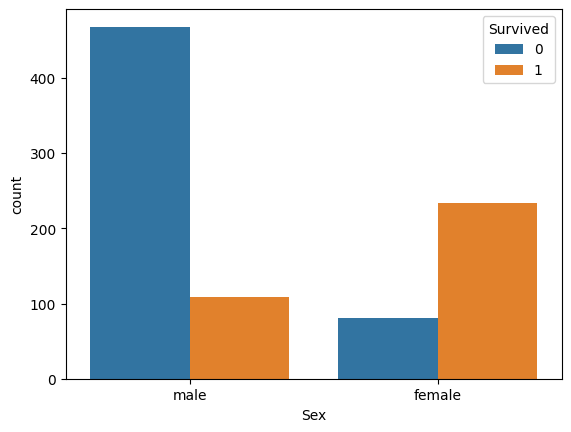

In [11]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

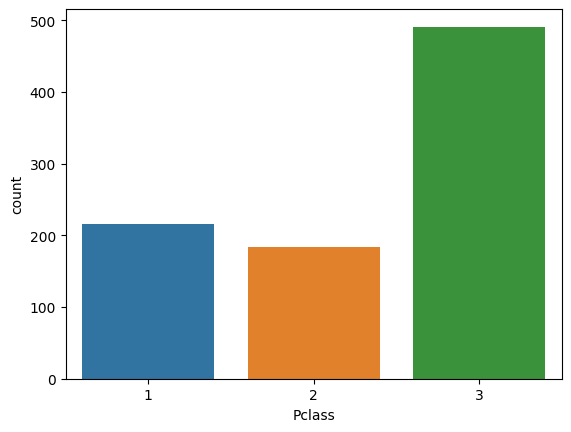

In [12]:
sns.countplot(x = 'Pclass', data=data)

<Axes: xlabel='Pclass', ylabel='count'>

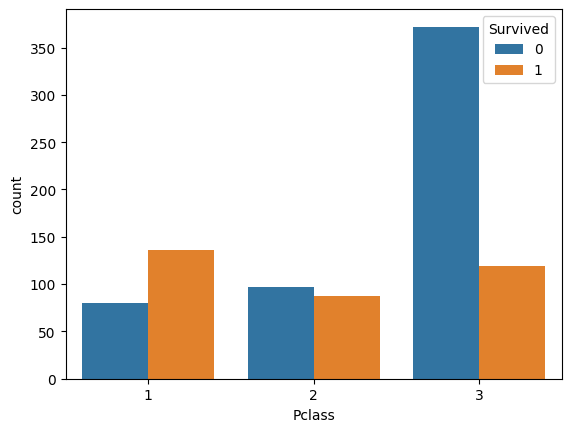

In [13]:
sns.countplot(x = 'Pclass', hue='Survived', data=data)

<Axes: xlabel='Survived', ylabel='count'>

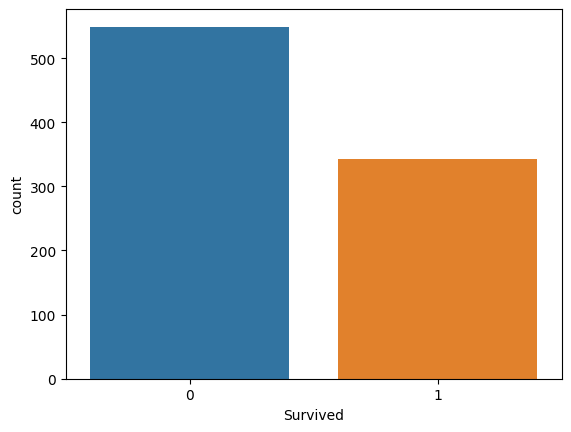

In [14]:
sns.countplot( x = 'Survived', data = data)

<Axes: xlabel='Sex', ylabel='count'>

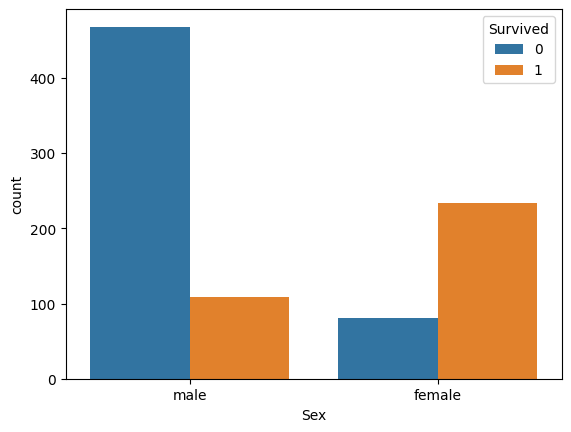

In [15]:
sns.countplot(x='Sex', hue='Survived', data=data)

In [16]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.fit_transform(test[col])
    print(le.classes_)

data.head(5)


['female' 'male']
['C' 'Q' 'S']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

y = data['Survived']
X = data.drop('Survived', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [20]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(X_val)
accuracy_score(y_val, predictions)

0.8100558659217877

In [21]:
submission_preds = clf.predict(test)

In [22]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": submission_preds,
                   })
df.to_csv("submission.csv", index=False)


Using Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
print('Accuracy:', dectree.score(X_val, y_val)) 
score = cross_val_score(dectree, X, y, cv=5)
print('CV Score:', np.mean(score))

Accuracy: 0.7932960893854749
CV Score: 0.77558847529973


Using Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
print('Accuracy:', rforest.score(X_val, y_val)) 
score = cross_val_score(rforest, X, y, cv=5)
print('CV Score:', np.mean(score))

Accuracy: 0.7988826815642458
CV Score: 0.8114744837110036
